<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>7</code><b>

<b>Group Members:</b>  

1. <code>Xiaoting_B00685239</code>
2. <code>Xuelian_B00977221</code>
3. <code>Siqi_B00976996</code>

# 1. Dataset Information 

<h4> Dataset Name: <code> Credit_approval</code></h4>
<h4> Link to the Dataset: <code>https://archive.ics.uci.edu/dataset/27/credit+approval</code> </h4>
<h4> Dataset Description: </h4>
<code> This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. </code>

# 2. Task Information 

<h4> Task Goal: <code> Predict the final decision of credit application. </code></h4>
<h4> Task Description: </h4>
    <code> The task is designed to predict the final decision on a credit application based on the applicant's personal and financial situation (e.g. income, marriage, debt, etc.). Four models were used for comparison of prediction performance, namely logistic regression, random forest, KNN and Bayesian model. </code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import ssl
import warnings
warnings.filterwarnings('ignore')
print(ssl.get_default_verify_paths())

DefaultVerifyPaths(cafile=None, capath=None, openssl_cafile_env='SSL_CERT_FILE', openssl_cafile='C:\\Program Files\\Common Files\\SSL/cert.pem', openssl_capath_env='SSL_CERT_DIR', openssl_capath='C:\\Program Files\\Common Files\\SSL/certs')


In [47]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
X = credit_approval.data.features 
y = credit_approval.data.targets 

In [48]:
X = X.iloc[:, [14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]]
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750


In [49]:
y

,A16
0,+
1,+
2,+
3,+
4,+
...,...
685,-
686,-
687,-
688,-


In [50]:
df = X.merge(y,how='outer', left_index=True, right_index=True)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [51]:
df = df.rename(columns={"A1":"Gender","A2":"Age","A3":"Debt","A4":"Married","A5":"BankCustomer","A6":"EducationLevel",
                        "A7":"Ethnicity","A8":"YearsEmployed","A9":"PriorDefault","A10":"Employed","A11":"CreditScore",
                        "A12":"DriverLicense","A13":"Citizen","A14":"ZipCode","A15":"Income","A16":"ApprovalStatus"})
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriverLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [52]:
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriverLicense      0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [53]:
df = df.dropna(axis=0)
df = df.drop_duplicates()
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriverLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [54]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriverLicense     0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

# Encode and Normalization

In [55]:
df['ApprovalStatus'] = df['ApprovalStatus'].map({'+' : 1, '-' : 0})
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriverLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [56]:
from sklearn.preprocessing import LabelEncoder
#Apply label encoding on all columns with type of object
df[list(df.columns[df.dtypes == object])]  = df[list(df.columns[df.dtypes == object])].apply(LabelEncoder().fit_transform)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriverLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,1
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,1
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,1
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,1
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,0
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,0
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,0
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,0


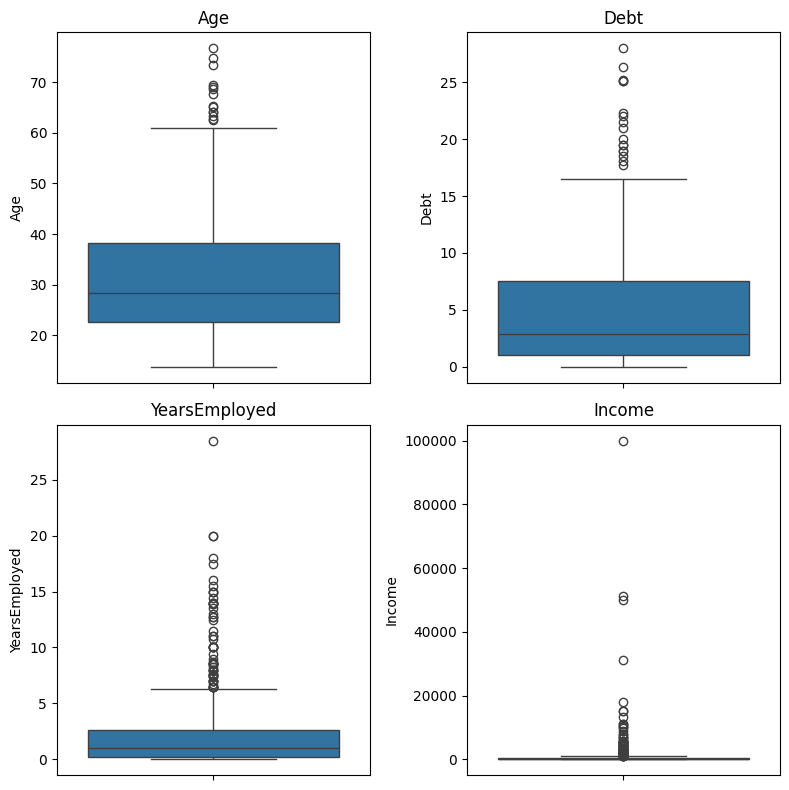

In [57]:
# Plotting boxplots for continuous columns to identify outliers
plt.figure(figsize=(8, 8))
columns = ['Age','Debt','YearsEmployed','Income']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    #sns.boxplot(y=train_data[col])
    #sns.boxplot(data = df , x = 'ApprovalStatus' , y = col)
    sns.boxplot(data = df , y = col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriverLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,0.271111,0.000000,1,0,12,7,0.043860,1,1,1,0,0,202.0,0.00000,1
1,0,0.713016,0.159286,1,0,10,3,0.106667,1,1,6,0,0,43.0,0.00560,1
2,0,0.170635,0.017857,1,0,10,3,0.052632,1,0,0,0,0,280.0,0.00824,1
3,1,0.223492,0.055000,1,0,12,7,0.131579,1,1,5,1,0,100.0,0.00003,1
4,1,0.101905,0.200893,1,0,12,7,0.060000,1,0,0,0,2,120.0,0.00000,1


Check the distribution of variables

<Axes: ylabel='Density'>

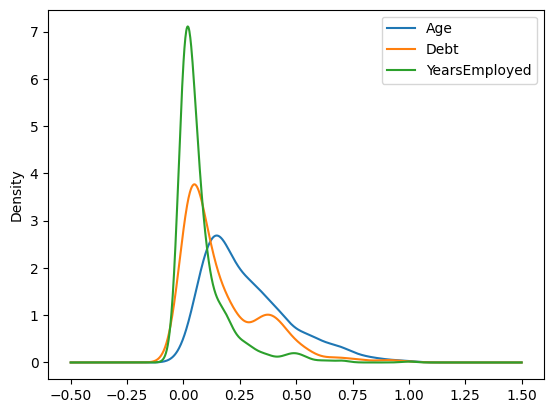

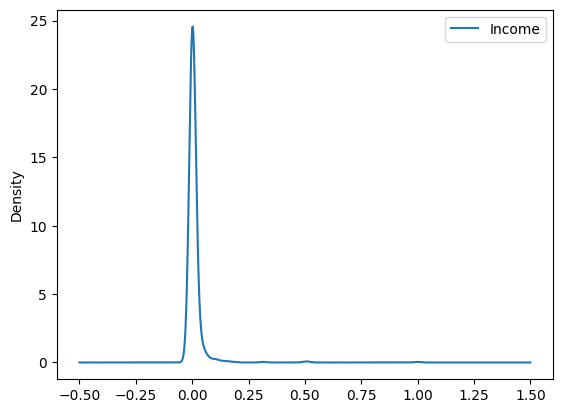

In [59]:
df.iloc[:,[1,2,7]].plot.kde()
df.iloc[:,[14]].plot.kde()

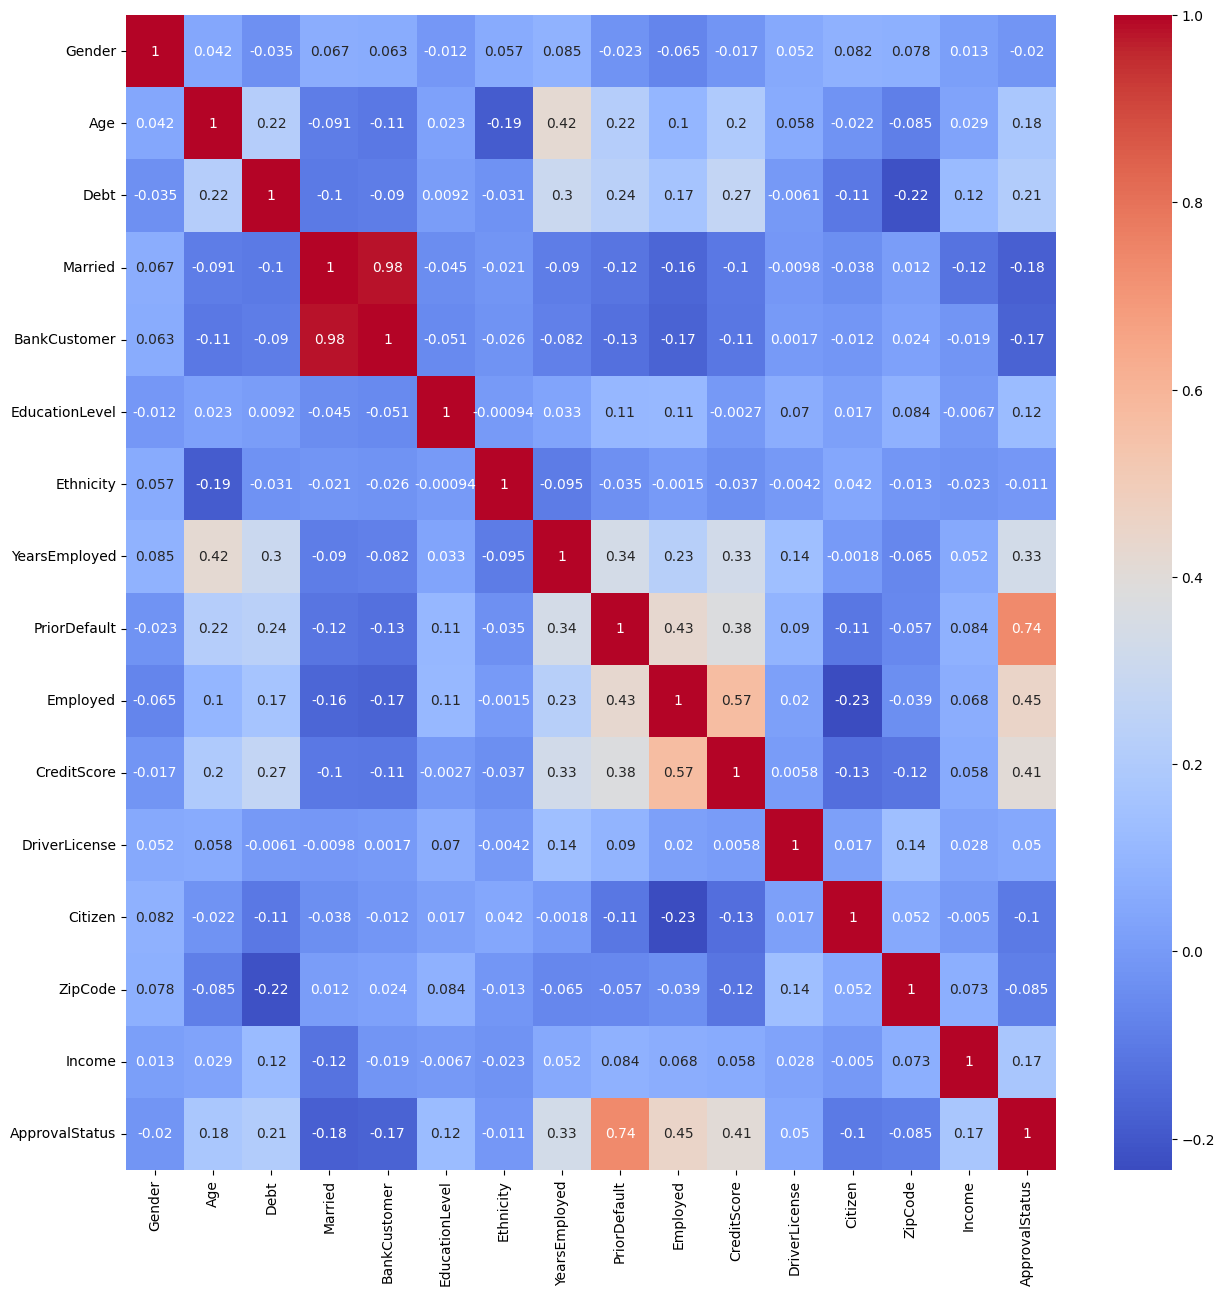

In [60]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.gcf().set_size_inches(15, 15)
plt.show()

### 3.2 Model development and evaluation

#### 3.2.1 Logistic Regression

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, accuracy_score

X = df.iloc[:,0:15]
y = df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### 3.2.1.1 Hyperparameter tune

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# define param grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2','elasticnet'],
    'tol': [1e-4, 1e-3, 1e-2],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# build model
logistic = LogisticRegression(max_iter=1000)

# GridSearchCV
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# get best params and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# use best params
best_logistic = LogisticRegression(**best_params, max_iter=1000)
best_logistic.fit(X_train, y_train)
y_pred_best = best_logistic.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)



print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", accuracy_best)
print("Classification Report:\n", class_report)


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Best Cross-Validation Score: 0.8642618251313904
Test Set Accuracy: 0.8877551020408163
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       112
           1       0.84      0.90      0.87        84

    accuracy                           0.89       196
   macro avg       0.88      0.89      0.89       196
weighted avg       0.89      0.89      0.89       196



##### 3.2.1.2 Model evaluation

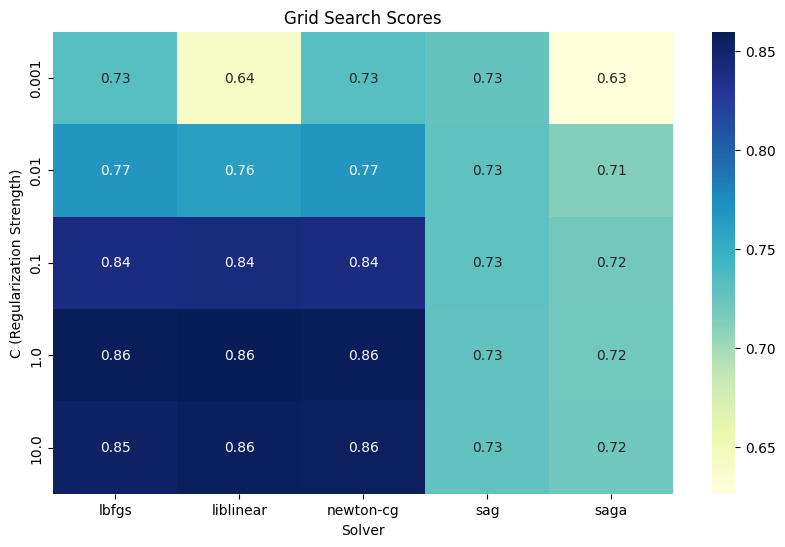

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# get result
results = pd.DataFrame(grid_search.cv_results_)

# choose parameters
param_1 = 'param_C'
param_2 = 'param_solver'

# plot
pivot_table = results.pivot_table(values='mean_test_score', 
                                  index=[param_1], 
                                  columns=[param_2])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Grid Search Scores')
plt.xlabel('Solver')
plt.ylabel('C (Regularization Strength)')
plt.show()

#### 3.2.2 KNN Classifier

In [64]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X = df.iloc[:,0:15]
y = df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = KNN.predict(X_test.to_numpy())

cm = classification_report(y_test.to_numpy(),y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.64      0.86      0.73       109
           1       0.69      0.39      0.50        87

    accuracy                           0.65       196
   macro avg       0.67      0.63      0.62       196
weighted avg       0.66      0.65      0.63       196



##### 3.2.2.1 Hyperparameter tune

In [65]:
k_range = range(1,50)
cv_range = [2,3,4,5,6,7,8,9,10]
k_scores = []
cv_scores = []


#for i in cv_range:
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(KNN, X_train.to_numpy(), y_train.to_numpy(), cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    #cv_scores[i,:] = k_scores
print(k_scores)
print(k_scores.index(max(k_scores)))

[0.6761108456760629, 0.6432632584806497, 0.7090301003344482, 0.6892737697085524, 0.715551839464883, 0.6827281414237938, 0.6958910654562829, 0.6783325370281892, 0.6870520783564262, 0.6914715719063544, 0.6740324892498805, 0.6740324892498805, 0.6696368848542761, 0.6586478738652651, 0.6521022455805064, 0.6543000477783086, 0.678356426182513, 0.6717391304347826, 0.6651935021500238, 0.6717869087434305, 0.6564739608217869, 0.6498805542283803, 0.6410654562828475, 0.6498805542283803, 0.6345676063067367, 0.6433349259436215, 0.6455566172957478, 0.6477305303392259, 0.6499283325370282, 0.6520783564261825, 0.6564739608217869, 0.6674390826564739, 0.6478260869565218, 0.65, 0.6521739130434783, 0.6631151457238414, 0.6455566172957478, 0.6433588150979456, 0.6368131868131869, 0.6412087912087913, 0.6498805542283803, 0.6543478260869566, 0.6629956999522217, 0.6695652173913043, 0.6673674151935021, 0.6608695652173913, 0.6476588628762541, 0.6564261825131391, 0.6411371237458193]
4


Text(0, 0.5, 'Cross-Validated Accuracy')

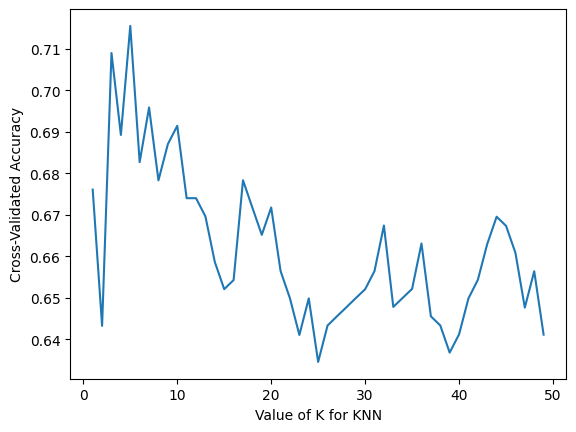

In [66]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

##### 3.2.2.2 Model evaluation

In [67]:
KNN = KNeighborsClassifier(n_neighbors=k_range[k_scores.index(max(k_scores))])
KNN.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = KNN.predict(X_test.to_numpy())

cm = classification_report(y_test.to_numpy(),y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       109
           1       0.65      0.51      0.57        87

    accuracy                           0.66       196
   macro avg       0.66      0.64      0.64       196
weighted avg       0.66      0.66      0.65       196



#### 3.2.3 Naive Bayes Classifier

In [68]:
from sklearn.naive_bayes import GaussianNB
GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)
y_pred = GaussNB.predict(X_test)
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       109
           1       0.95      0.63      0.76        87

    accuracy                           0.82       196
   macro avg       0.86      0.80      0.81       196
weighted avg       0.85      0.82      0.81       196



In [69]:
from sklearn.naive_bayes import BernoulliNB
BernoNB = BernoulliNB(force_alpha=True)
BernoNB.fit(X_train, y_train)
y_pred = BernoNB.predict(X_test)
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       109
           1       0.85      0.71      0.77        87

    accuracy                           0.82       196
   macro avg       0.82      0.81      0.81       196
weighted avg       0.82      0.82      0.81       196



In [70]:
from sklearn.naive_bayes import MultinomialNB
MultiNomNB = MultinomialNB()
MultiNomNB.fit(X_train, y_train)
y_pred = MultiNomNB.predict(X_test)
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       109
           1       0.68      0.64      0.66        87

    accuracy                           0.71       196
   macro avg       0.71      0.70      0.70       196
weighted avg       0.71      0.71      0.71       196



#### 3.2.4 Random Forest Classifier

In [71]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
X = df.iloc[:,0:15]
y = df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

##### 3.2.4.3 Hyperparameter tune

In [73]:
rf_classifier = RandomForestClassifier(random_state=42)

In [74]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
}

In [75]:
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy')

In [76]:
print("Best Hyperparameters_RandomSearch:", random_search.best_params_)

Best Hyperparameters_RandomSearch: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [77]:
best_rf_model_Random = random_search.best_estimator_
y_pred = best_rf_model_Random.predict(X_val)

In [78]:
accuracy = accuracy_score(y_val, y_pred)
print("Random Search Validation Accuracy:", accuracy)

Random Search Validation Accuracy: 0.8913043478260869


In [79]:
confusion_mat = confusion_matrix(y_val, y_pred)
print("Random Search Confusion Matrix:\n", confusion_mat)

Random Search Confusion Matrix:
 [[47  5]
 [ 5 35]]


In [80]:
class_report = classification_report(y_val, y_pred)
print("Random Search Classification Report:\n", class_report)

Random Search Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.88      0.88      0.88        40

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92



In [81]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
}

In [82]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [83]:
print("Best Hyperparameters_GridSearch:", grid_search.best_params_)

Best Hyperparameters_GridSearch: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


**The processing time of Grid Search is much slower than Random Search.The different results of these two kinds of hyperparameter tuning methods are:   
Random Search: "min_samples_split": 2,"n_estimators": 50,   
Grid Search: "min_samples_split": 10, "n_estimators:: 150  
Compare the performance for the validation set: (Random Search already done)
**

In [84]:
best_rf_model_Grid = grid_search.best_estimator_
y_pred = best_rf_model_Grid.predict(X_val)

In [85]:
accuracy = accuracy_score(y_val, y_pred)
print("Grid Search Validation Accuracy:", accuracy)

Grid Search Validation Accuracy: 0.8695652173913043


In [86]:
confusion_mat = confusion_matrix(y_val, y_pred)
print("Grid Search Confusion Matrix:\n", confusion_mat)

Grid Search Confusion Matrix:
 [[47  5]
 [ 7 33]]


In [87]:
class_report = classification_report(y_val, y_pred)
print("Grid Search Classification Report:\n", class_report)

Grid Search Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.87      0.82      0.85        40

    accuracy                           0.87        92
   macro avg       0.87      0.86      0.87        92
weighted avg       0.87      0.87      0.87        92



##### 3.2.4.3 Model evaluation

**The performances from the random grid is better. Just use the hyperparameter from random grid to train the test dataset**

In [88]:
best_rf_model_Random = random_search.best_estimator_
y_test_pred = best_rf_model_Random.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8775510204081632


In [90]:
confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[105   9]
 [ 15  67]]


In [91]:
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       114
           1       0.88      0.82      0.85        82

    accuracy                           0.88       196
   macro avg       0.88      0.87      0.87       196
weighted avg       0.88      0.88      0.88       196

